<a href="https://colab.research.google.com/github/preet8935/House-Price-Prediction-usingLinear-Regression/blob/master/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [57]:
bias=200
X, y, coef=make_regression(n_features=1, noise=10, bias=bias, random_state=42,coef= True)

In [58]:
X.shape, y.shape

((100, 1), (100,))

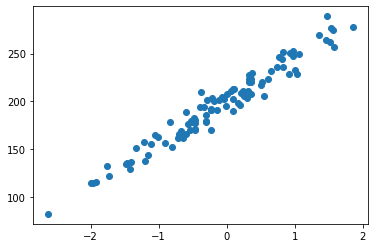

In [59]:
plt.scatter(X,y)

In [60]:
coef, bias #m,c from sklearn

(array(41.74110031), 200)

In [61]:
y_gen = X*coef +bias #equation of line

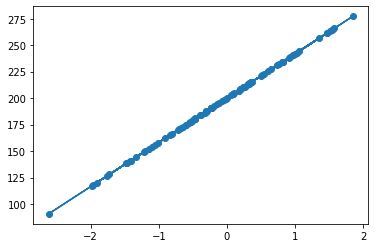

In [62]:
plt.scatter(X,y_gen)
plt.plot(X,y_gen)

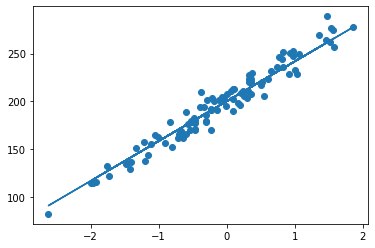

In [63]:
plt.scatter(X, y)
plt.plot(X, y_gen)

In [64]:
#lets aplot a line using linear regression
from sklearn.linear_model import LinearRegression

In [65]:
model= LinearRegression()
model.fit(X,y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
model.coef_, model.intercept_

(array([44.43716999]), 201.16511532052695)

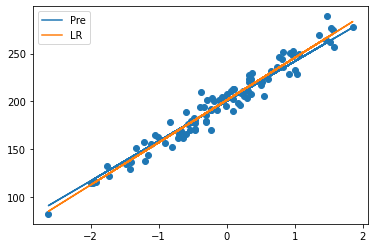

In [67]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="LR")
plt.legend()


In [68]:
class LinearRegCustom:
     #constructor
    def __init__(self,lr=0.1):
       self.lr=lr
    
     #training fxn i.e. fit
    def fit(self, X, y):
        self._X = X # _X mock behavior like private
        self._y = y.reshape(-1, 1) # do calculations, else it will give error due to some numpy shape
             
        # need to figure out value of coef & intercept
        # step 1: pick these values at random 

        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()

        # gradient descent
        errors = []
        
        # lets say we do this 50 times
        for i in range(50):
          self.gradient_decend()
          errors.append(self.error())
        return errors
    def gradient_decend(self):
        # change in coef and intercept
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
    
    def gradient(self):
        yh = self.predict(self._X) # from predict funtion
        
        d_coef = ((yh - self._y) * self._X).mean()
        d_intercept = (yh - self._y).mean()
        
        return d_coef, d_intercept
    
    def predict(self, X):
        return X * self.coef_ + self.intercept_
    
    def error(self):
        return ((self.predict(self._X) - self._y) ** 2).sum()

        



In [69]:
model = LinearRegCustom(lr=.1)


In [70]:
errors = model.fit(X, y)
model.coef_, model.intercept_


(42.749256680011925, 199.66719814492075)

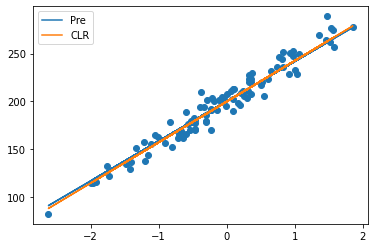

In [71]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="CLR")
plt.legend()

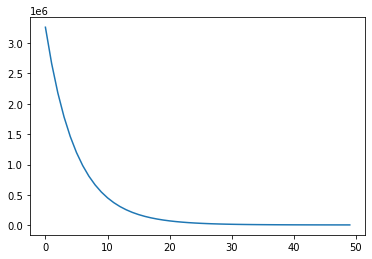

In [72]:
plt.plot(errors)


# Housing Price Prediction using Linear Regression



In [73]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split


In [74]:
X, y = load_boston(return_X_y=True)
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [75]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
model.predict(X_test[:1])


array([28.53469469])

In [77]:
X_test[:1]


array([[9.1780e-02, 0.0000e+00, 4.0500e+00, 0.0000e+00, 5.1000e-01,
        6.4160e+00, 8.4100e+01, 2.6463e+00, 5.0000e+00, 2.9600e+02,
        1.6600e+01, 3.9550e+02, 9.0400e+00]])